Regresión Logística
===

* *45 min* | Ultima modificación: Junio 22, 2019

## Descripción del problema

Se desea determinar a cuál clase ($A$, $B$ o $C$) pertenece un elemento, a partir de resultados previamente recolectados.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

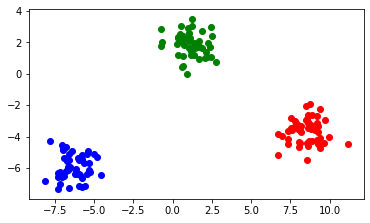

In [2]:
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS, 
    n_features=2,
    centers=3,
    cluster_std=0.8, 
    shuffle=False,  
    random_state=12345)

plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

## Regresión Logística

La solución anterior muestra los inconvenientes de abordar problemas de clasificación como problemas de regresión. Un problema similar ocurrio con la clasificación usando perceptrones bipolares. Este impase puede ser resuelto si se tiene en cuenta que un perceptrón continuo con función sigmoidea es equivalente a un modelo de regresión logística.

En este caso, la ecuación del perceptrón 

$$y = \sigma \left( \sum_{i=0}^n w_{i,k} x_{i,k} \right)$$

puede interpretarse como la probabilidad de que el punto $\mathbf{x}_i$ pertenezca a la clase de interés.

En la regresión logística, los parámetros del modelo se estiman a través de la minimización de la función de entropía cruzada, definida como:

$$ \frac{1}{P} \sum_i^P d_i \cdot \log(\text{prob}(y_i)) + 
(1-d_i) \cdot \log(1- \text{prob}(y_i))
$$ 

En la regresión logística se desea construir un modelo que permite determinar si un patrón ($x_1$, $x_2$) pertenece a una clase determinada o no. Ya que el ejemplo presentado contiene más de dos clases debe ser recodificado; una forma es especificar un modelo que indique si ($x_1$, $x_2$) pertenece a la clase $A$ o al resto (las clases {$A$, $B$}); y otro modelo que indique si pertenece a la clase $B$ o no. Si el patrón no pertenece ni a $A$ ni a $B$, entonces pertenece a $C$. La secuencia de decisiones descrita puede ser representada por un árbol de decisiones.

A partir de este punto, el problema consiste en determinar si un patrón pertenece a una de dos clases mutuamente exclusivas y colectivamente exhaustivas (un patrón no puede pertenecer a las dos clases simultáneamente y cada patrón debe pertenecer a una clase de las dos clases posibles). Si se usa una variable indicadora $y$ que vale $1$ cuando el patrón pertenece a la clase $A$ y cero cuando no pertenece, entonces se podría plantear un modelo lineal de la forma:

$$ y =
   \begin{cases}
      1, & \text{if $\theta_0 + \theta_1 x_1 + \theta_2 x_2 > 0$} \\
      \\
      0, &\text{en caso contrario.}
   \end{cases}
$$

La estimación de los parámetros del modelo de regresión en la ecuación anterior no puede realizarse usando regresión lineal.

En la siguiente figura, se presenta un ejemplo con un grupo de puntos en el eje $X$ que pertenecen a una de dos clases; si $y=1$ el punto pertenece a la clase $A$ y en caso contrario a la clase $B$. Si se ajusta un modelo de regresión lineal de la forma:

$$y = \theta_0 + \theta_1 x$$

se obtiene la línea recta que aparece en dicha figura.

![assets/logreg-1.jpg](assets/logreg-1.jpg)

Como puede observarse, el modelo no permite realizar la discriminación entre las clases de cada punto. Para ello, los valores de $y$ deben limitarse al intervalo $[0, 1]$.  

La función logística es definida como:

$$\sigma(u) = \frac{1}{1+\exp(-u)}$$

![assets/logreg-2.jpg](assets/logreg-2.jpg)

La regresión logística se define como:

$$y = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$$

La cual puede interpretarse como la probabilidad de que el punto ($x_1$, $x_2$) pertenezca a la clase $A$.

Al aplicar la regresión logística al segundo ejemplo planteado se obtiene la línea roja de la figura de abajo, la cual representa la probabilidad de pertenencia de un punto a la clase $A$. Para $y$ = 0.5, hay una probabilidad del 50% de que el patrón pertenezca a la clase $A$ y 50% de que no pertenezca; este es un punto de indeterminación, de tal forma que el punto $x$ en que se da esta valor se conoce como frontera de decisión.  

![assets/logreg-3.jpg](assets/logreg-3.jpg)

En la siguiente figura se presenta un problema de clasificación para tres clases diferentes. Cada línea representa la frontera de decisión entre un grupo y los demás. Si las flechas indican la probabilidad de pertenencia a un grupo, noté que hay una región de indeterminación en el centro.

![assets/logreg-4.jpg](assets/logreg-4.jpg)

## Solución usando Python

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

logisticRegression = LogisticRegression(
    penalty='l2',            # ‘l1’, ‘l2’, ‘elasticnet’, ‘none’
    tol=0.0001,              # stop criteria
    C=1.0,                   # factor inverso para regularizacion (SVM)
    fit_intercept=True,      #
    class_weight=None,       # None, dict or ‘balanced’
    random_state=None,       # 
    solver='lbfgs',          # 'newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
    max_iter=100,            #
    multi_class='auto',      # ‘ovr’, ‘multinomial’, ‘auto’
    verbose=0,               # 
    warm_start=False,        # ?re-usa la solución previa
    l1_ratio=None            # Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1
)

logisticRegression.fit(X, d)

logisticRegression.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
logisticRegression.predict([[2.5, -4.0]])

array([0])

In [5]:
logisticRegression.intercept_

array([-2.3011144 , -0.84597237,  3.14708678])

In [6]:
logisticRegression.coef_

array([[ 0.72852127, -0.43464882],
       [-0.59331499, -0.4699242 ],
       [-0.13520628,  0.90457302]])

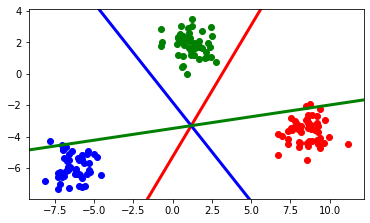

In [7]:
plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)

fronteraA = (- logisticRegression.intercept_[0] / logisticRegression.coef_[0][1] 
             - logisticRegression.coef_[0][0] / logisticRegression.coef_[0][1] * xplot)

fronteraB = (- logisticRegression.intercept_[1] / logisticRegression.coef_[1][1] 
             - logisticRegression.coef_[1][0] / logisticRegression.coef_[1][1] * xplot)

fronteraC = (- logisticRegression.intercept_[2] / logisticRegression.coef_[2][1] 
             - logisticRegression.coef_[2][0] / logisticRegression.coef_[2][1] * xplot)

plt.plot(xplot, fronteraA, color='red', linewidth=3)
plt.plot(xplot, fronteraB, color='blue', linewidth=3)
plt.plot(xplot, fronteraC, color='green', linewidth=3);

plt.xlim(xlim)
plt.ylim(ylim);

In [8]:
logisticRegression.predict_proba(X)[0:10]

array([[9.98661503e-01, 5.11632194e-05, 1.28733409e-03],
       [9.97709742e-01, 2.43339689e-05, 2.26592371e-03],
       [9.99853268e-01, 2.03670814e-05, 1.26364523e-04],
       [9.98884814e-01, 4.22746463e-05, 1.07291161e-03],
       [9.98956200e-01, 1.32743179e-05, 1.03052555e-03],
       [9.96811239e-01, 4.76528501e-04, 2.71223203e-03],
       [9.99789658e-01, 9.87278646e-06, 2.00468825e-04],
       [9.97446880e-01, 9.92161954e-05, 2.45390423e-03],
       [9.99962062e-01, 1.88831023e-06, 3.60493693e-05],
       [9.98169070e-01, 1.04321247e-04, 1.72660864e-03]])

### Solución usando R

In [9]:
%load_ext rpy2.ipython

In [10]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = d

In [11]:
%%R -i df
str(df)

'data.frame':	150 obs. of  3 variables:
 $ x1: num  8.67 9.21 9.4 8.81 9.67 ...
 $ x2: num  -3.45 -2.68 -4.71 -3.49 -2.96 ...
 $ y : int  0 0 0 0 0 0 0 0 0 0 ...


**Actividad.--** Para los datos propuestos, estime tres regresiones logísticas que permitan determinar si un punto pertenece a un clase o al resto. Grafique los puntos y las fronteras de decisión.

A continuación se utilizará el lenguaje R para realizar la actividad:

In [12]:
%%R
##
## se carga la librería
##
library(glmnet)

##
## Modelo 1.
## A contra otros (B y C)
##  
df1 <- df                        ## se crea una copia del dataframe original
df1$y <- gsub("A", 1, df1$y)     ## se cambia la clase A por el número 1
df1$y <- gsub("B", 2, df1$y)     ## se cambia la clase B por el número 2
df1$y <- gsub("C", 2, df1$y)     ## se cambia la clase C por el número 2
tail(df1)

R[write to console]: Loading required package: Matrix

R[write to console]: Loading required package: foreach

R[write to console]: Loaded glmnet 2.0-18




          x1        x2 y
144 1.402550 1.7304749 2
145 2.434281 2.9911338 2
146 1.045178 2.6036857 2
147 2.752287 0.7826971 2
148 1.051907 1.6342375 2
149 1.658551 2.0620898 2


In [13]:
%%R
x <- as.matrix(df1[,c('x1','x2')])   ## se genera una matriz con las variables regresoras (x1, x2)
y <- df1$y                           ## se crea un vector que contenga la variable de decisión (clase)

La función `gmlnet` entrena la regresión logística a partir de la iteración del modelo con diferentes lambdas, en donde trata de minimizar la suma de errores al cuadrado, por defecto. La salida sería aproximadamente 100 valores estimados de parámetros para diferentes niveles de lambda, como se muestra a continuación:

In [14]:
%%R
##
## Se entra el modelo.
##
glm.fit <- glmnet(x, y, family = 'multinomial')
glm.fit


Call:  glmnet(x = x, y = y, family = "multinomial") 

      Df       %Dev    Lambda
 [1,]  0 -1.213e-15 0.4398000
 [2,]  2  8.146e-02 0.4008000
 [3,]  2  2.059e-01 0.3652000
 [4,]  2  3.081e-01 0.3327000
 [5,]  2  3.923e-01 0.3032000
 [6,]  2  4.630e-01 0.2762000
 [7,]  2  5.232e-01 0.2517000
 [8,]  2  5.750e-01 0.2293000
 [9,]  2  6.199e-01 0.2090000
[10,]  2  6.592e-01 0.1904000
[11,]  2  6.937e-01 0.1735000
[12,]  2  7.242e-01 0.1581000
[13,]  2  7.513e-01 0.1440000
[14,]  2  7.754e-01 0.1312000
[15,]  2  7.969e-01 0.1196000
[16,]  2  8.161e-01 0.1089000
[17,]  2  8.334e-01 0.0992700
[18,]  2  8.489e-01 0.0904500
[19,]  2  8.629e-01 0.0824200
[20,]  2  8.755e-01 0.0750900
[21,]  2  8.869e-01 0.0684200
[22,]  2  8.972e-01 0.0623500
[23,]  2  9.065e-01 0.0568100
[24,]  2  9.149e-01 0.0517600
[25,]  2  9.225e-01 0.0471600
[26,]  2  9.295e-01 0.0429700
[27,]  2  9.357e-01 0.0391500
[28,]  2  9.415e-01 0.0356800
[29,]  2  9.467e-01 0.0325100
[30,]  2  9.514e-01 0.0296200
[31,]  2  9.557

In [15]:
%%R
##
## es posible acceder a diferentes modelos para diferentes niveles de lambda
## en este caso se escoge un nivel de 0.01
## la salida corresponde a los parametros teta estudiados anteriormente en módulo
##
c <- coef(glm.fit,s =0.01)
c

$`0`
3 x 1 sparse Matrix of class "dgCMatrix"
                    1
(Intercept) -1.405481
x1           0.504727
x2           .       

$`1`
3 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) -0.6727753
x1          -0.1576664
x2           .        

$`2`
3 x 1 sparse Matrix of class "dgCMatrix"
                   1
(Intercept) 2.078256
x1          .       
x2          1.150638

